In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns  
import numpy as np



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer


In [2]:
#df = pd.read_csv('bijankhan_corpus.tsv', sep='\t', header=0)
df = pd.read_csv('updated_bijankhan_corpus.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602536 entries, 0 to 2602535
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   token       object
 2   pos_tag     object
 3   ezafe_tag   int64 
dtypes: int64(2), object(2)
memory usage: 79.4+ MB


In [3]:
df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag
0,0,!هنری!,SUBJ,0
1,1,#,DELM,0
2,2,مسعود,N_SING_PR,1
3,3,شجاعی,N_SING_PR,1
4,4,طباطبایی,N_SING_PR,0


ezafe_tag
0    2016358
1     586178
Name: count, dtype: int64


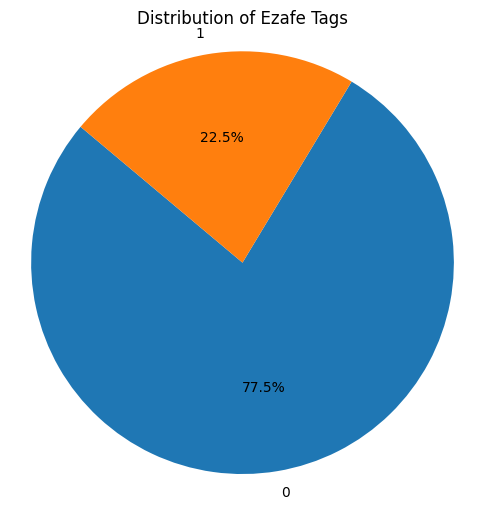

In [9]:
ezafe_counts = df['ezafe_tag'].value_counts()

# Print the counts
print(ezafe_counts)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(ezafe_counts, labels=ezafe_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ezafe Tags')
plt.show()

In [4]:
p=df['pos_tag'].unique()
#p contains all unique pos_tags (about 480)

In [5]:
dict={}
for i in range(len(p)):
    dict[p[i]]=i
print(len(dict))

483


In [6]:
#pos_tags are text in pos_tag_num to each unique pos_tag we assign a number from 0 to len(dict)
pos_tag_num=[]
for i in range(len(df)):
        if(df['pos_tag'][i] in dict):
            pos_tag_num.append(dict[df['pos_tag'][i]])
    

In [7]:
new_df = df
new_df['pos_tag'] = pos_tag_num
#in new_df, pos_tag is not an object its int

# Add attributes for pos_tag_left and pos_tag_right
new_df['pos_tag_left'] = new_df['pos_tag'].shift(1).fillna(0)
new_df['pos_tag_right'] = new_df['pos_tag'].shift(-1).fillna(0)

# For the first row, set pos_tag_left to 0 (if not already set by fillna)
new_df.at[0, 'pos_tag_left'] = 0

# For the last row, set pos_tag_right to 0
last_index = new_df.index[-1]
new_df.at[last_index, 'pos_tag_right'] = 0

# Display the DataFrame to verify the changes
new_df.head()



,Unnamed: 0,token,pos_tag,ezafe_tag,pos_tag_left,pos_tag_right
0,0,!هنری!,0,0,0.0,1.0
1,1,#,1,0,0.0,2.0
2,2,مسعود,2,1,1.0,2.0
3,3,شجاعی,2,1,2.0,2.0
4,4,طباطبایی,2,0,2.0,1.0


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602536 entries, 0 to 2602535
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   token          object 
 2   pos_tag        int64  
 3   ezafe_tag      int64  
 4   pos_tag_left   float64
 5   pos_tag_right  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 119.1+ MB


In [11]:
X = new_df['pos_tag'].values
y = new_df['ezafe_tag'].values
X=X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0384, shuffle=False)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, accuracy_score, f1_score
import numpy as np
import xgboost as xgb

models = [
    ("LR", LogisticRegression(max_iter=1000)),
    ("NC", NearestCentroid()),
    ("RF", RandomForestClassifier()),
    ("ADA", AdaBoostClassifier()),
    ("XGB", xgb.XGBClassifier(eval_metric='mlogloss'))
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append((name, precision, accuracy, f1))
    
    print(f"{name} - Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}")


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  0, 1 or np.nan (according to ``zero_division``). Plus, if


LR - Precision: 0.5681651964408851, Accuracy: 0.7537673357481639, F1 Score: 0.6479367985246501
NC - Precision: 0.7138039477001508, Accuracy: 0.43116732374071925, F1 Score: 0.4351826850863031
RF - Precision: 0.8371876096925148, Accuracy: 0.8050691428685786, F1 Score: 0.8141158419052714
ADA - Precision: 0.8084316470788019, Accuracy: 0.7912305629490284, F1 Score: 0.7975451765356164
XGB - Precision: 0.8331533898813533, Accuracy: 0.8035181812723888, F1 Score: 0.8122124802642956


random forest and XGBoost are doing better than other models.
